# Bonus: Wine Quality Classification Model

In this bonus, we will build a classification model to predict the quality of wine.

# Import Library

In [1008]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [1009]:
df = pd.read_csv("../data/anggur.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


# Split Training and Test set

We will split the training and test set to determine the performance of a classification model.

In [1010]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['quality'], random_state=42)

In [1011]:
X_train = train_set.drop(['quality'], axis=1)
y_train = train_set['quality']
X_test = test_set.drop(['quality'], axis=1)
y_test = test_set['quality']

In [1012]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
244,7.72,0.5451,0.1264,2.801338,0.091782,20.567663,38.42,0.9963,3.29,0.72,10.56
917,8.27,0.7417,0.2181,2.339661,0.063838,8.221410,55.40,0.9950,3.29,0.61,11.20
895,7.49,0.4576,0.2252,3.177156,0.075400,18.603452,55.58,0.9922,3.25,0.68,8.97
66,7.25,0.5545,0.2535,1.721984,0.089206,21.507712,43.33,0.9921,3.35,0.46,11.19
331,9.44,0.5490,0.2622,5.210260,0.054500,24.021371,39.76,0.9998,3.25,0.55,10.97
...,...,...,...,...,...,...,...,...,...,...,...
732,6.72,0.4886,0.2933,2.178067,0.085630,15.476538,45.15,0.9973,3.20,0.51,13.87
547,5.30,0.5220,0.3049,1.130890,0.089340,13.756951,48.34,0.9976,3.32,0.55,11.32
569,8.18,0.3570,0.1931,1.693136,0.077684,7.751049,38.81,0.9952,3.46,0.63,10.11
155,7.40,0.4505,0.2401,2.798932,0.069678,23.568005,48.41,0.9965,3.44,0.55,13.58


In [1013]:
y_train

244     8
917     9
895     7
66      8
331     9
       ..
732     9
547     8
569     8
155    10
52     10
Name: quality, Length: 800, dtype: int64

In [1014]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
643,9.37,0.4153,0.2638,3.430787,0.056311,16.719396,24.74,0.9979,3.38,0.54,12.41
612,7.90,0.4026,0.2746,2.791431,0.082855,6.172613,28.34,0.9987,3.27,0.54,11.16
822,6.82,0.5197,0.3358,2.408717,0.100882,13.210217,41.16,0.9958,3.17,0.56,8.96
982,8.25,0.5035,0.2690,1.573458,0.105009,7.389244,38.75,0.9956,3.42,0.66,10.48
588,7.91,0.6452,0.2551,3.074861,0.123317,15.755803,33.95,0.9992,3.28,0.50,12.20
...,...,...,...,...,...,...,...,...,...,...,...
748,6.32,0.4472,0.2593,3.599399,0.069487,11.033585,28.55,0.9955,3.19,0.56,12.40
957,7.88,0.4736,0.2887,4.380263,0.055661,21.633450,45.21,0.9963,3.30,0.52,9.18
884,6.88,0.4912,0.2175,1.992063,0.082524,9.005354,33.34,0.9966,3.50,0.71,11.31
688,7.44,0.6484,0.2596,3.196452,0.038998,21.260241,34.14,0.9962,3.38,0.62,7.19


In [1015]:
y_test

643    10
612     8
822     7
982     8
588     9
       ..
748     9
957     8
884     8
688     6
170     6
Name: quality, Length: 200, dtype: int64

# Data Preprocessing

In this section, we will process the data before feeding it into a classifier.

## Handle Missing Values

In [1016]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


There are no missing values to be handled.

# Encode Target Variable

The values in the target variable range from 5 to 10, which may work for some classification models but other models may require the target variable to have values starting from 0 and incrementing by 1.

In [1017]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Generate Synthetic Data

The data to be trained is relatively small, therefore we will perform resampling to balance the class distribution, then generate synthetic data using augmentation with Gaussian noise.

In [1018]:
from imblearn.over_sampling import SMOTE

# Perform oversampling to balance the classes
y_counts = np.bincount(y_train)
min_sample = np.min(y_counts[np.nonzero(y_counts)]) - 1
sm = SMOTE(random_state=42, k_neighbors=min_sample)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [1019]:
# Set the standard deviation of the Gaussian noise to add
std_dev = 0.1

# Generate new data points with Gaussian noise added
n_iter = 5
fold = len(X_train)

for i in range(n_iter):
    for j in range(fold):
        synthetic_data = X_train.iloc[j].values + np.random.normal(loc=0, scale=std_dev, size=X_train.shape[1])
        synthetic_data_df = pd.DataFrame(synthetic_data.reshape(1, -1), columns=X_train.columns)
        X_train = pd.concat([X_train, synthetic_data_df], axis=0)
        y_train = np.append(y_train, y_train[j])

In [1020]:
print(len(X_train), len(y_train))

12924 12924


# Feature Scaling

In this section, we aim to perform feature scaling by transforming the numerical columns of our data into a normal standard distribution. The purpose of this transformation is to make the data comparable across different features, as well as to improve the performance of linear-based classification models. This way, the classifiers can more effectively recognize patterns in the data and make accurate predictions, regardless of the range of values in the original data.

In [1021]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1022]:
X_train

array([[ 0.65066188,  0.22472489, -1.33732389, ...,  0.04638432,
         0.99118125,  0.22716987],
       [ 1.05039913,  1.67835607, -0.44315074, ...,  0.04638432,
         0.15164928,  0.48779326],
       [ 0.48349903, -0.42223711, -0.37391814, ..., -0.24398311,
         0.6858969 , -0.42031635],
       ...,
       [ 0.16082745, -1.52734396,  0.98722   , ...,  0.96227328,
         0.55311443,  1.64866168],
       [ 0.56565969,  0.84972886, -1.64360931, ..., -0.16819   ,
        -0.97252942,  1.36956385],
       [ 1.54875651,  0.56386636, -0.41566247, ...,  0.79181839,
         0.36833465,  0.87357648]])

In [1023]:
X_test

array([[ 1.84987364e+00, -7.34997022e-01,  2.47317665e-03, ...,
         6.99711025e-01, -3.82598333e-01,  9.80534350e-01],
       [ 7.81484980e-01, -8.28898934e-01,  1.07784737e-01, ...,
        -9.87993946e-02, -3.82598333e-01,  4.71504299e-01],
       [-3.45362807e-03,  3.69210615e-02,  7.04550244e-01, ...,
        -8.24717958e-01, -2.29956157e-01, -4.24388591e-01],
       ...,
       [ 4.01540724e-02, -1.73803703e-01, -4.49001382e-01, ...,
         1.57081330e+00,  9.14860164e-01,  5.32587905e-01],
       [ 4.47159277e-01,  9.88509733e-01, -3.84813190e-02, ...,
         6.99711025e-01,  2.27970371e-01, -1.14517514e+00],
       [-6.43033235e-01,  5.38963570e-01,  2.63801863e-01, ...,
        -3.16574964e-01, -9.92892647e-04, -8.88623998e-01]])

# Implement Classifiers

In this section, we will fit multiple models to the processed training data.

## Logistic Regression

In [1024]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

## Support Vector Machine

In [1025]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

## XGBoost

In [1026]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Voting Classifier

In [1027]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42, max_iter=10000)), 
                                    ('xgb', XGBClassifier())], voting='hard')
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

# Evaluation

In this section, we will determine the performance of each model towards the test set.

## Test set Performance

In [1028]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        50
           3       0.96      0.81      0.88        90
           4       0.76      0.86      0.81        44
           5       0.70      1.00      0.82         7

    accuracy                           0.88       200
   macro avg       0.80      0.92      0.84       200
weighted avg       0.89      0.88      0.88       200



In [1029]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.75      0.71         8
           2       0.92      0.88      0.90        50
           3       0.90      0.86      0.88        90
           4       0.79      0.86      0.83        44
           5       0.88      1.00      0.93         7

    accuracy                           0.86       200
   macro avg       0.69      0.72      0.71       200
weighted avg       0.86      0.86      0.86       200



In [1030]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      0.75      0.80         8
           2       0.90      0.90      0.90        50
           3       0.84      0.86      0.85        90
           4       0.73      0.75      0.74        44
           5       0.80      0.57      0.67         7

    accuracy                           0.82       200
   macro avg       0.69      0.64      0.66       200
weighted avg       0.83      0.82      0.82       200



In [1031]:
y_pred_vote = vote.predict(X_test)
print(classification_report(y_test, y_pred_vote, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94        50
           3       0.89      0.86      0.87        90
           4       0.77      0.75      0.76        44
           5       0.80      0.57      0.67         7

    accuracy                           0.86       200
   macro avg       0.81      0.84      0.81       200
weighted avg       0.86      0.86      0.86       200



## One-Versus-Rest ROC Curve

In [1032]:
from sklearn.metrics import roc_curve, auc

def plot_ovr_roc_curve(y_true, y_prob):
    n_classes = y_prob.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute macro-average ROC curve
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot ROC curves
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-versus-Rest ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [1033]:
# Predict probabilities for test set
y_prob = lr.predict_proba(X_test)

# Get true labels for test set
n_samples = y_prob.shape[0]
n_classes = lr.classes_.shape[0]
y_true = np.zeros((n_samples, n_classes))
for i in range(n_samples):
    true_label = y_test[i]
    y_true[i, true_label] = 1

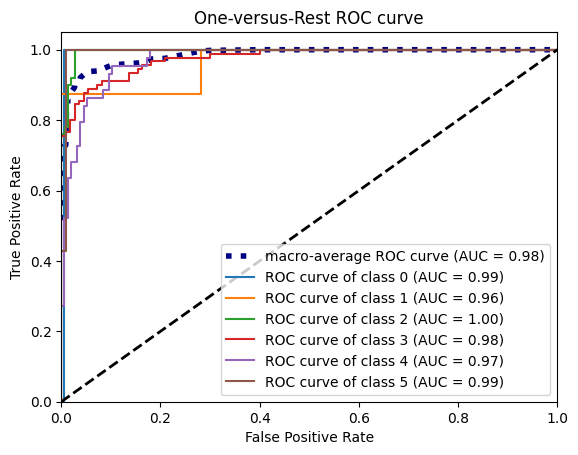

In [1034]:
plot_ovr_roc_curve(y_true, y_prob)

After conducting multiple trials, we can conclude that the **Logistic Regression model outperformed other models on the test data**. This could be attributed to the strong correlation between the `alcohol` feature and the target variable, where the average `alcohol` values for each class showed a linear relationship with the target variable. Logistic Regression is particularly suitable for datasets with linear relationships between input and output variables, which could explain why it performed the best in this case.